<a href="https://colab.research.google.com/github/faridaelsaie/tutorial/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Janna Samer

ID: 55-2302

Tutorial: T-10

---

Name: Farida Tamer

ID: 55-

Tutorial: T-10

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# !pip install seaborn
# plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
df.describe()
# summary of statistics


,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
df.describe(include='object')
# a summary of the non-numerical attributes

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6976,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,6976,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1584,5783,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$20.2,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,61,8,5163


In [ ]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [ ]:
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4168
No,2864


In [ ]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6352
No,680


In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2099


In [ ]:
df['Partner'].value_counts()

,count
Partner,
No,3639
Yes,3393


In [ ]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [ ]:
df['gender'].value_counts()

,count
gender,
Male,3549
Female,3483


In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),$105.65/m,$6844.5,No


## Data Cleaning

In [ ]:
# Customer ID
# Check for missing values in 'customerID'
missing_customer_id = df['customerID'].isna().sum()

# Print the number of missing values
print(f"Number of missing values in 'customerID': {missing_customer_id}")




Number of missing values in 'customerID': 56


In [ ]:
# Remove rows where 'customerID' has null values
df = df.dropna(subset=['customerID'])

# Verify that there are no missing values in 'customerID'
print(f"Number of missing values in 'customerID' after removal: {df['customerID'].isna().sum()}")

Number of missing values in 'customerID' after removal: 0


In [ ]:
# GENDER
df.rename(columns={'gender': 'Gender'}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   Gender            6976 non-null   object
 2   SeniorCitizen     6976 non-null   int64 
 3   Partner           6976 non-null   object
 4   Dependents        6976 non-null   object
 5   tenure            6976 non-null   int64 
 6   PhoneService      6976 non-null   object
 7   MultipleLines     6976 non-null   object
 8   InternetService   6976 non-null   object
 9   OnlineSecurity    6976 non-null   object
 10  OnlineBackup      6976 non-null   object
 11  DeviceProtection  6976 non-null   object
 12  TechSupport       6976 non-null   object
 13  StreamingTV       6976 non-null   object
 14  StreamingMovies   6976 non-null   object
 15  Contract          6976 non-null   object
 16  PaperlessBilling  6976 non-null   object
 17  PaymentMethod     6

In [ ]:
# SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].astype(pd.BooleanDtype())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   Gender            6976 non-null   object 
 2   SeniorCitizen     6976 non-null   boolean
 3   Partner           6976 non-null   object 
 4   Dependents        6976 non-null   object 
 5   tenure            6976 non-null   int64  
 6   PhoneService      6976 non-null   object 
 7   MultipleLines     6976 non-null   object 
 8   InternetService   6976 non-null   object 
 9   OnlineSecurity    6976 non-null   object 
 10  OnlineBackup      6976 non-null   object 
 11  DeviceProtection  6976 non-null   object 
 12  TechSupport       6976 non-null   object 
 13  StreamingTV       6976 non-null   object 
 14  StreamingMovies   6976 non-null   object 
 15  Contract          6976 non-null   object 
 16  PaperlessBilling  6976 non-null   object 
 17  

In [ ]:
# Partner
# Map "Yes" to True and "No" to False
df['Partner'] = df['Partner'].map({'Yes': True, 'No': False})

# Convert to Boolean type
df['Partner'] = df['Partner'].astype(pd.BooleanDtype())

# Check the result
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   Gender            6976 non-null   object 
 2   SeniorCitizen     6976 non-null   boolean
 3   Partner           6976 non-null   boolean
 4   Dependents        6976 non-null   object 
 5   tenure            6976 non-null   int64  
 6   PhoneService      6976 non-null   object 
 7   MultipleLines     6976 non-null   object 
 8   InternetService   6976 non-null   object 
 9   OnlineSecurity    6976 non-null   object 
 10  OnlineBackup      6976 non-null   object 
 11  DeviceProtection  6976 non-null   object 
 12  TechSupport       6976 non-null   object 
 13  StreamingTV       6976 non-null   object 
 14  StreamingMovies   6976 non-null   object 
 15  Contract          6976 non-null   object 
 16  PaperlessBilling  6976 non-null   object 
 17  

In [ ]:
# Dependents
df['Dependents'] = df['Dependents'].map({'Yes': True, 'No': False})

# Convert to Boolean type
df['Dependents'] = df['Dependents'].astype(pd.BooleanDtype())

# Check the result
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   Gender            6976 non-null   object 
 2   SeniorCitizen     6976 non-null   boolean
 3   Partner           6976 non-null   boolean
 4   Dependents        6976 non-null   boolean
 5   tenure            6976 non-null   int64  
 6   PhoneService      6976 non-null   object 
 7   MultipleLines     6976 non-null   object 
 8   InternetService   6976 non-null   object 
 9   OnlineSecurity    6976 non-null   object 
 10  OnlineBackup      6976 non-null   object 
 11  DeviceProtection  6976 non-null   object 
 12  TechSupport       6976 non-null   object 
 13  StreamingTV       6976 non-null   object 
 14  StreamingMovies   6976 non-null   object 
 15  Contract          6976 non-null   object 
 16  PaperlessBilling  6976 non-null   object 
 17  

In [ ]:
# Tenure
df.rename(columns={'tenure': 'Tenure'}, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   Gender            6976 non-null   object 
 2   SeniorCitizen     6976 non-null   boolean
 3   Partner           6976 non-null   boolean
 4   Dependents        6976 non-null   boolean
 5   Tenure            6976 non-null   int64  
 6   PhoneService      6976 non-null   object 
 7   MultipleLines     6976 non-null   object 
 8   InternetService   6976 non-null   object 
 9   OnlineSecurity    6976 non-null   object 
 10  OnlineBackup      6976 non-null   object 
 11  DeviceProtection  6976 non-null   object 
 12  TechSupport       6976 non-null   object 
 13  StreamingTV       6976 non-null   object 
 14  StreamingMovies   6976 non-null   object 
 15  Contract          6976 non-null   object 
 16  PaperlessBilling  6976 non-null   object 
 17  

In [ ]:
# Phone service
df['PhoneService'] = df['PhoneService'].map({'Yes': True, 'No': False})

# Convert to Boolean type
df['PhoneService'] = df['PhoneService'].astype(pd.BooleanDtype())

# Check the result
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   Gender            6976 non-null   object 
 2   SeniorCitizen     6976 non-null   boolean
 3   Partner           6976 non-null   boolean
 4   Dependents        6976 non-null   boolean
 5   Tenure            6976 non-null   int64  
 6   PhoneService      6976 non-null   boolean
 7   MultipleLines     6976 non-null   object 
 8   InternetService   6976 non-null   object 
 9   OnlineSecurity    6976 non-null   object 
 10  OnlineBackup      6976 non-null   object 
 11  DeviceProtection  6976 non-null   object 
 12  TechSupport       6976 non-null   object 
 13  StreamingTV       6976 non-null   object 
 14  StreamingMovies   6976 non-null   object 
 15  Contract          6976 non-null   object 
 16  PaperlessBilling  6976 non-null   object 
 17  

In [ ]:
# MultipleLines
# df.loc[df['MultipleLines'].str.contains('No phone service', case=False, na=False), 'MultipleLines'] = 'No'
# print(df['MultipleLines'].unique())
# DO ONE HOT ENCODING

['No' 'Yes']


In [ ]:
# InternetService
# DO ONE HOT ENCODING

In [ ]:
# OnlineSecurity
df.loc[df['OnlineSecurity'].str.contains('No internet service', case=False, na=False), 'OnlineSecurity'] = 'No'
print(df['OnlineSecurity'].unique())
# DO ONE HOT ENCODING

['No' 'Yes']


In [ ]:
# OnlineBackup
df.loc[df['OnlineBackup'].str.contains('No internet service', case=False, na=False), 'OnlineBackup'] = 'No'
print(df['OnlineBackup'].unique())
# DO ONE HOT ENCODING

['Yes' 'No']


In [ ]:
# DeviceProtection
df.loc[df['DeviceProtection'].str.contains('No internet service', case=False, na=False), 'DeviceProtection'] = 'No'
print(df['DeviceProtection'].unique())
# DO ONE HOT ENCODING

['No' 'Yes']


In [ ]:
# TechSupport
df.loc[df['TechSupport'].str.contains('No internet service', case=False, na=False), 'TechSupport'] = 'No'
print(df['TechSupport'].unique())
# DO ONE HOT ENCODING

['No' 'Yes']


In [ ]:
# StreamingTV
df.loc[df['StreamingTV'].str.contains('No internet service', case=False, na=False), 'StreamingTV'] = 'No'
print(df['StreamingTV'].unique())
# DO ONE HOT ENCODING

['No' 'Yes']


In [ ]:
# StreamingMovies
df.loc[df['StreamingMovies'].str.contains('No internet service', case=False, na=False), 'StreamingMovies'] = 'No'
print(df['StreamingMovies'].unique())
# DO ONE HOT ENCODING

['No' 'Yes']


In [1]:
# Contract
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories= ['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)


NameError: name 'pd' is not defined

In [ ]:
df[df['Contract'] <= 'One year']

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,False,False,False,45,False,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,7750-EYXWZ,Female,False,False,False,12,False,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,$60.65/m,$743.3,No
7027,6840-RESVB,Male,False,True,True,24,True,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,False,True,True,72,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,False,True,True,11,False,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No


In [ ]:
# PaperlessBilling
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': True, 'No': False})

# Convert to Boolean type
df['PaperlessBilling'] = df['PaperlessBilling'].astype(pd.BooleanDtype())

# Check the result
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6976 non-null   object  
 1   Gender            6976 non-null   object  
 2   SeniorCitizen     6976 non-null   boolean 
 3   Partner           6976 non-null   boolean 
 4   Dependents        6976 non-null   boolean 
 5   Tenure            6976 non-null   int64   
 6   PhoneService      6976 non-null   boolean 
 7   MultipleLines     6976 non-null   object  
 8   InternetService   6976 non-null   object  
 9   OnlineSecurity    6976 non-null   object  
 10  OnlineBackup      6976 non-null   object  
 11  DeviceProtection  6976 non-null   object  
 12  TechSupport       6976 non-null   object  
 13  StreamingTV       6976 non-null   object  
 14  StreamingMovies   6976 non-null   object  
 15  Contract          6976 non-null   category
 16  PaperlessBilling  6976 non-nu

In [ ]:
# PaymentMethod
# df['PaymentMethod'] = df['PaymentMethod'].astype('category')

# print(df.info())
LEAVE OBJ

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6976 non-null   object  
 1   Gender            6976 non-null   object  
 2   SeniorCitizen     6976 non-null   boolean 
 3   Partner           6976 non-null   boolean 
 4   Dependents        6976 non-null   boolean 
 5   Tenure            6976 non-null   int64   
 6   PhoneService      6976 non-null   boolean 
 7   MultipleLines     6976 non-null   object  
 8   InternetService   6976 non-null   object  
 9   OnlineSecurity    6976 non-null   object  
 10  OnlineBackup      6976 non-null   object  
 11  DeviceProtection  6976 non-null   object  
 12  TechSupport       6976 non-null   object  
 13  StreamingTV       6976 non-null   object  
 14  StreamingMovies   6976 non-null   object  
 15  Contract          6976 non-null   category
 16  PaperlessBilling  6976 non-nu

In [ ]:
# Monthly charges
df['MonthlyCharges'] = df['MonthlyCharges'].str.extract(r'(\d+\.\d+|\d+)', expand=False)

# Convert to float
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

# Rename the column
df.rename(columns={'MonthlyCharges': 'MonthlyCharges ($/m)'}, inplace=True)
print(df['MonthlyCharges ($/m)'].unique())
print(df.info())

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customerID            6976 non-null   object  
 1   Gender                6976 non-null   object  
 2   SeniorCitizen         6976 non-null   boolean 
 3   Partner               6976 non-null   boolean 
 4   Dependents            6976 non-null   boolean 
 5   Tenure                6976 non-null   int64   
 6   PhoneService          6976 non-null   boolean 
 7   MultipleLines         6976 non-null   object  
 8   InternetService       6976 non-null   object  
 9   OnlineSecurity        6976 non-null   object  
 10  OnlineBackup          6976 non-null   object  
 11  DeviceProtection      6976 non-null   object  
 12  TechSupport           6976 non-null   object  
 13  StreamingTV           6976 non-null   object  
 14  StreamingMovies    

In [ ]:
df['MonthlyCharges ($/m)'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [ ]:
# total charges
df['TotalCharges'] = df['TotalCharges'].str.extract(r'(\d+\.\d+|\d+)', expand=False)

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Rename the column
df.rename(columns={'TotalCharges': 'TotalCharges ($)'}, inplace=True)
print(df['TotalCharges ($)'].unique())
print(df.info())


[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customerID            6976 non-null   object  
 1   Gender                6976 non-null   object  
 2   SeniorCitizen         6976 non-null   boolean 
 3   Partner               6976 non-null   boolean 
 4   Dependents            6976 non-null   boolean 
 5   Tenure                6976 non-null   int64   
 6   PhoneService          6976 non-null   boolean 
 7   MultipleLines         6976 non-null   object  
 8   InternetService       6976 non-null   object  
 9   OnlineSecurity        6976 non-null   object  
 10  OnlineBackup          6976 non-null   object  
 11  DeviceProtection      6976 non-null   object  
 12  TechSupport           6976 non-null   object  
 13  StreamingTV           6976 non-null   object  
 14  Streami

In [ ]:
unique_total_charges = df['TotalCharges ($)'].unique()

# Print the unique values
print(unique_total_charges)
nan_values = df['TotalCharges ($)'].isna().sum()

# Print the number of NaN values
print(f"Number of NaN values in 'TotalCharges ($)': {nan_values}")

[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Number of NaN values in 'TotalCharges ($)': 796


In [ ]:
# df['TotalCharges ($)'] = df['TotalCharges ($)'].fillna(df['MonthlyCharges ($/m)'] * 12)
# print(df['TotalCharges ($)'].unique())

# Replace NaN values in 'TotalCharges ($)' with 'tenure * MonthlyCharges ($/m)'
df['TotalCharges ($)'] = df['TotalCharges ($)'].fillna(df['Tenure'] * df['MonthlyCharges ($/m)'])

# Verify if there are any null values remaining in 'TotalCharges ($)'
missing_total_charges = df['TotalCharges ($)'].isna().sum()
print(f"Number of missing values in 'TotalCharges ($)': {missing_total_charges}")

# Optional: Display unique values to confirm changes
print(df['TotalCharges ($)'].unique())

Number of missing values in 'TotalCharges ($)': 0
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [ ]:
# Check for null values in 'TotalCharges ($)' after replacing NaNs
nulls_in_total_charges = df['TotalCharges ($)'].isna().sum()

# Print the number of null values
print(f"Number of null values in 'TotalCharges ($)': {nulls_in_total_charges}")

Number of null values in 'TotalCharges ($)': 0


In [ ]:
# Churn
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [ ]:
df=df.drop('customerID',axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges ($/m),TotalCharges ($),Churn
0,Female,False,True,False,1,False,No,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,0
1,Male,False,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,0
2,Male,False,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,1
3,Male,False,False,False,45,False,No,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,0
4,Female,False,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                6976 non-null   object  
 1   SeniorCitizen         6976 non-null   boolean 
 2   Partner               6976 non-null   boolean 
 3   Dependents            6976 non-null   boolean 
 4   Tenure                6976 non-null   int64   
 5   PhoneService          6976 non-null   boolean 
 6   MultipleLines         6976 non-null   object  
 7   InternetService       6976 non-null   object  
 8   OnlineSecurity        6976 non-null   object  
 9   OnlineBackup          6976 non-null   object  
 10  DeviceProtection      6976 non-null   object  
 11  TechSupport           6976 non-null   object  
 12  StreamingTV           6976 non-null   object  
 13  StreamingMovies       6976 non-null   object  
 14  Contract              6976 non-null   category
 15  Paperless

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

<Axes: >

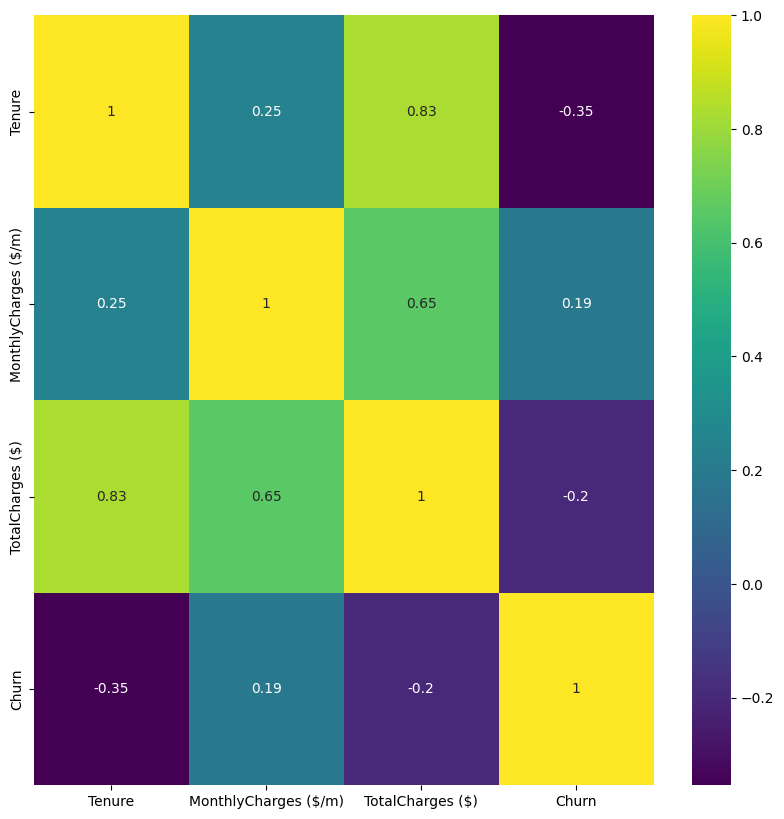

In [ ]:
# to improve the plot's clarity, it will be set to a larger size using the line below
plt.figure(figsize=(10,10))

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation
corr = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='viridis', annot=True)
# add CHI2 to  heat map for categorical (make sure eno senior citizen is in it)

In [ ]:
#Label Encoding
df_le = df.copy()

categorical_columns = df.select_dtypes(include= [object, 'category'])

for column in categorical_columns:
         df_le[column] = df_le[column].astype('category').cat.codes

df_le

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges ($/m),TotalCharges ($),Churn
0,0,False,True,False,1,False,0,0,0,1,0,0,0,0,0,True,2,29.85,29.85,0
1,1,False,False,False,34,True,0,0,1,0,1,0,0,0,1,False,3,56.95,1889.50,0
2,1,False,False,False,2,True,0,0,1,1,0,0,0,0,0,True,3,53.85,108.15,1
3,1,False,False,False,45,False,0,0,1,0,1,1,0,0,1,False,0,42.30,1840.75,0
4,0,False,False,False,2,True,0,1,0,0,0,0,0,0,0,True,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,False,True,True,24,True,1,0,1,0,1,1,1,1,1,True,3,84.80,1990.50,0
7028,0,False,True,True,72,True,1,1,0,1,1,0,1,1,1,True,1,103.20,7362.90,0
7029,0,False,True,True,11,False,0,0,1,0,0,0,0,0,0,True,2,29.60,346.45,0
7030,1,True,True,False,4,True,1,1,0,0,0,0,0,0,0,True,3,74.40,306.60,1


<ipython-input-50-44bb4bbda196>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-50-44bb4bbda196>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-50-44bb4bbda196>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-50-44bb4bbda196>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-50-44bb4bbda196>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

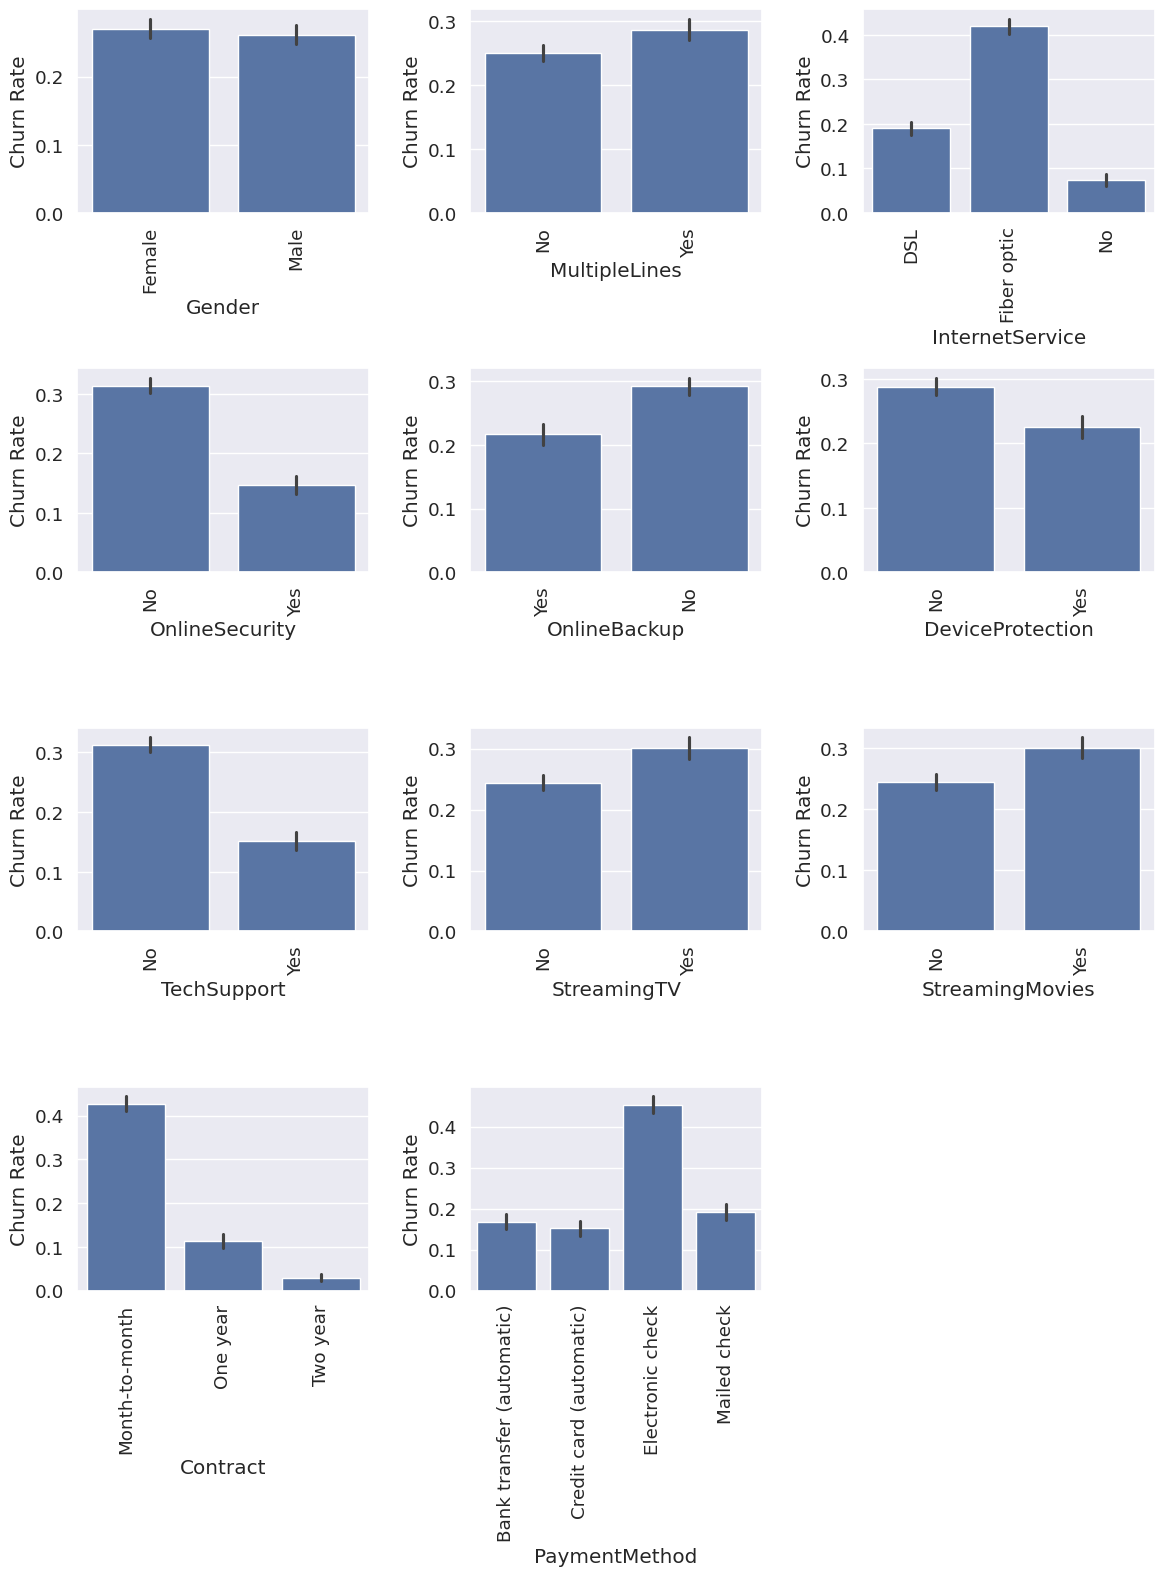

In [ ]:
# # Plotting every feature average in relation to the "target"
# sns.set(font_scale=1.2)
# plt.figure(figsize=(40, 40))

# for i, column in enumerate(categorical_features, 1):
#     plt.subplot(3, 3, i)
#     g = sns.barplot(x=column, y='Churn', data=df)
#     g.set_xticklabels(g.get_xticklabels(), rotation=90)
#     plt.ylabel('Churn Count')
#     plt.xlabel(f'{column}')

# Setting the font scale for better readability
sns.set(font_scale=1.2)

# Automatically identify categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calculate number of rows and columns needed for the subplots
n_cols = 3  # Number of columns you want for the plots
n_rows = int(np.ceil(len(categorical_features) / n_cols))  # Calculate rows dynamically

# Define the figure size based on the number of rows and columns
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Loop through each categorical feature and plot its average in relation to the target variable 'Churn'
for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust the grid layout for subplots dynamically

    # Create a bar plot showing the average 'Churn' value for each category in the column
    g = sns.barplot(x=column, y='Churn', data=df, estimator='mean')

    # Rotate x-axis labels for readability
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

    # Set x and y axis labels
    plt.ylabel('Churn Rate')
    plt.xlabel(f'{column}')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()



**Answer for Q1**: Your answer here
For the first -its total charges
the seond is payment method

**Q2: Which payment method has the highest churn rate?**

<ipython-input-51-9684dfaf2ee1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_churn_counts = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='Frequency')


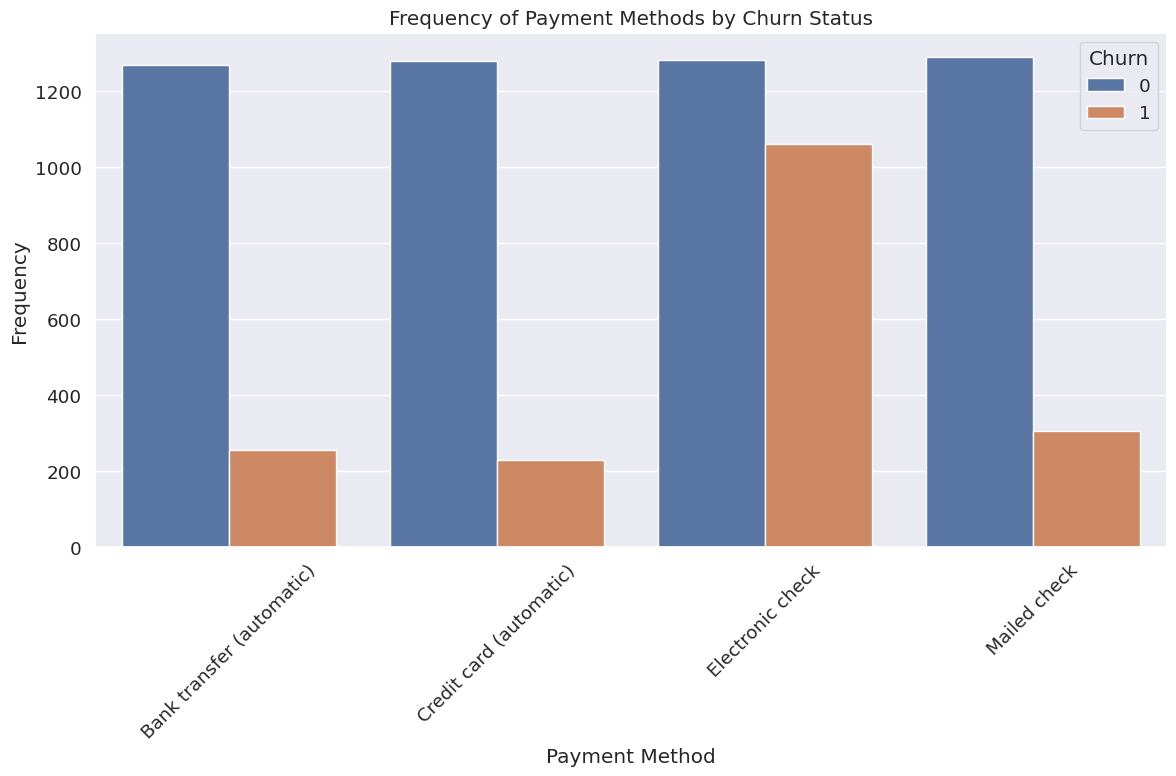

In [ ]:
# Count frequency of each PaymentMethod for each Churn status
payment_churn_counts = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='Frequency')

# Set up the plot size for clarity
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='PaymentMethod', y='Frequency', hue='Churn', data=payment_churn_counts)

# Set plot labels and title
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency of Payment Methods by Churn Status')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Visualization**

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

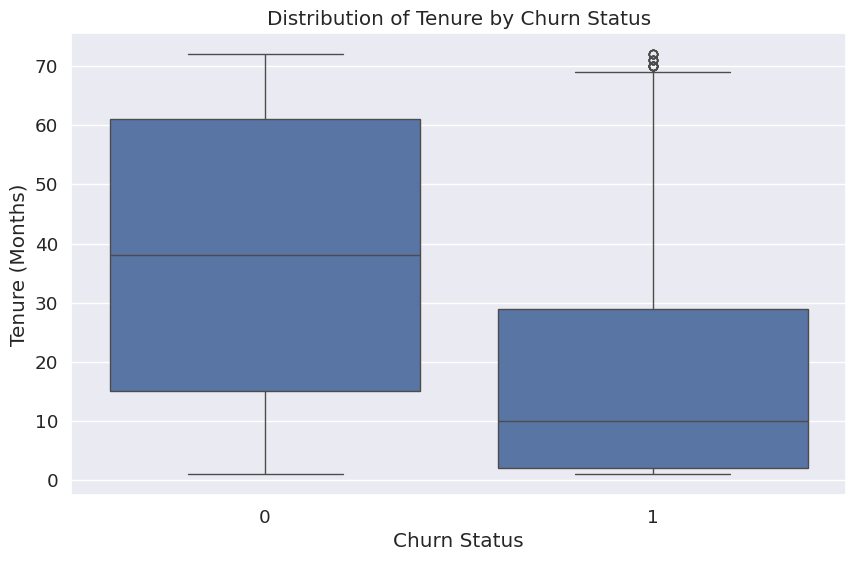

In [ ]:
# Set up the plot size for clarity
plt.figure(figsize=(10, 6))

# Create a box plot of tenure by Churn status
sns.boxplot(x='Churn', y='Tenure', data=df)

# Set plot labels and title
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')
plt.title('Distribution of Tenure by Churn Status')

plt.show()

**Answer for Q3**: Your answer here
10 months

## Data Preparation for Modelling

In [ ]:
df_encoded = df.copy()

In [ ]:
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']

,Contract
0,0
1,1
2,0
3,1
4,0
...,...
7027,1
7028,1
7029,0
7030,0


In [ ]:
categorical_features.remove('Contract')

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6976 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            6976 non-null   boolean
 1   Partner                                  6976 non-null   boolean
 2   Dependents                               6976 non-null   boolean
 3   Tenure                                   6976 non-null   int64  
 4   PhoneService                             6976 non-null   boolean
 5   Contract                                 6976 non-null   int8   
 6   PaperlessBilling                         6976 non-null   boolean
 7   MonthlyCharges ($/m)                     6976 non-null   float64
 8   TotalCharges ($)                         6976 non-null   float64
 9   Churn                                    6976 non-null   int8   
 10  Gender_Female                            6976 non-nul

In [ ]:
df_encoded.drop([
    'MultipleLines_No',
    'Gender_Female',
    'OnlineSecurity_No',
    'OnlineBackup_No',
    'DeviceProtection_No',
    'TechSupport_No',
    'StreamingTV_No',
    'StreamingMovies_No'
], axis='columns', inplace=True)

# Display remaining columns
# return any col with 3 vals to 2 only and m ake sure to remove from here (duplicates)
df_encoded.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService',
       'Contract', 'PaperlessBilling', 'MonthlyCharges ($/m)',
       'TotalCharges ($)', 'Churn', 'Gender_Male', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)
graph


trace the tree and get rule

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.82%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    0.99      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3581.00 1302.00      1.00    4883.00       4883.00
_______________________________________________
Confusion Matrix: 
 [[3580    1]
 [   8 1294]]

Test Result:
Accuracy Score: 73.34%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.50      0.73       0.66          0.73
recall       0.82   0.48      0.73       0.65          0.73
f1-score     0.82   0.49      0.73       0.65          0.73
support   1540.00 553.00      0.73    2093.00       2093.00
_______________________________________________
Confusion Matrix: 
 [[1268  272]
 [ 

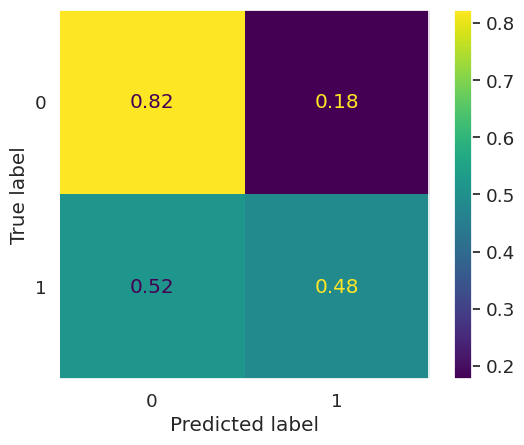

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.5504885993485342
Recall:  0.6112115732368897
F1_score:  0.5792630676949443


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records),
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.51473923, 0.4965358 , 0.50681818])

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.51 (+/- 0.01)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best paramters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 76.06%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.86    0.54      0.76       0.70          0.77
recall       0.81    0.62      0.76       0.72          0.76
f1-score     0.83    0.58      0.76       0.71          0.77
support   3581.00 1302.00      0.76    4883.00       4883.00
_______________________________________________
Confusion Matrix: 
 [[2901  680]
 [ 489  813]]

Test Result:
Accuracy Score: 76.54%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.85   0.55      0.77       0.70          0.77
recall       0.82   0.61      0.77       0.72          0.77
f1-score     0.84   0.58      0.77       0.71          0.77
support   1540.00 553.

## Bonus (Optional)